In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [4]:
secretnum = str(bin(156))
print(secretnum)

0b10011100


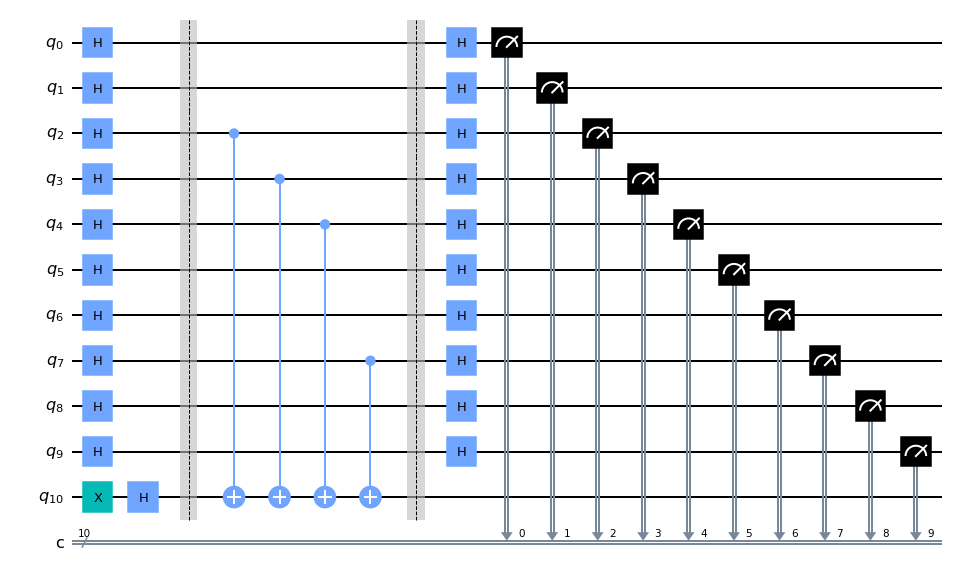

In [5]:
circuit = QuantumCircuit(len(secretnum)+1, len(secretnum))

# NEXT STEP FOR NOV 9 MAKE THIS ALG GENERALIZED AND ALSO READ QISKIT CHAPTER ON IT TO DO THE MATH
circuit.h(range(len(secretnum)))
circuit.x(len(secretnum))
circuit.h(len(secretnum))
circuit.barrier()

# Build secret box, a cx gate means the secret value is a 1 and it goes left to right from down to up
for x, yesno in enumerate(reversed(secretnum)):
    if yesno == '1':
        circuit.cx(x, len(secretnum))
circuit.barrier()

#Fourier sampling - basically a reverse hadamard transform
circuit.h(range(len(secretnum)))

# Measuring circuit
circuit.measure(range(len(secretnum)),range(len(secretnum)))

circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()

# CONVERT COUNTS DICT TO INT DECIMAL
binval = 0
for num in counts:
    if num == '0' or '1':
        binval = num

intval = 0 
for x, yesno in enumerate(reversed(binval)):
    if yesno == '1':
        intval += 2 ** x
print(intval)

156
